<a href="https://colab.research.google.com/github/RitvikPrabhu/AutoCBC/blob/master/Milestone1_AutoCBC/AutoId_and_count_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HemeAI: AutoCBC**

###Author: Ritvik Prabhu

First let us import a tool that can clear extremely verbose outputs


In [ ]:
from IPython.display import clear_output 

Below we will clone our repository. The repository will contain the model files, annotated dataset and setup.py which are all necessary to train the model used for the first milestone of the project.

In [ ]:
!git clone https://github.com/RitvikPrabhu/AutoCBC.git
%cd AutoCBC
!pip install -r requirements.txt
%cd Milestone1_AutoCBC
clear_output()

The code below will allows us to reset our directory without having to shutdown the entire runtime

In [ ]:
# !rm -rf AutoCBC/


Import the necessary files and ensure the hardware is compatible

In [ ]:
import ultralytics
from ultralyticsplus import YOLO, render_result

ultralytics.checks()

Ultralytics YOLOv8.0.23 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.8/78.2 GB disk)


We will load the necessary pretrained YOLO model and train the model to our dataset

In [ ]:
# Load a model
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="data.yaml", epochs=50, imgsz=640, task = "object-detection", optimizer="Adam")  # train the model
metrics = model.val()  # evaluate model performance on the validation set
clear_output()
# task=detect, mode=train, model=yolov8m.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.001, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, dfl=1.5, fl_gamma=0.0, label_smoothing=0.0, nbs=64, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.9, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.1, copy_paste=0.1, cfg=None, v5loader=False, save_dir=runs/detect/train

We locate the model with the most favorable weights and store in the home directory and name it "CBCWeights.pt". We will use these weights in the model and edit some hyperparameters of the model. We will use this to detect objects using bounding boxes

Ultralytics YOLOv8.0.23 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/AutoCBC/datasets/data/Testing/images/BloodImage_00391.jpg: 480x640 19 RBCs, 1 WBC, 1 Platelets, 14.6ms
Speed: 0.4ms pre-process, 14.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


tensor([[4.99000e+02, 2.48000e+02, 6.22000e+02, 3.56000e+02, 9.98123e-01, 0.00000e+00],
        [2.20000e+01, 3.12000e+02, 1.36000e+02, 4.32000e+02, 9.97083e-01, 0.00000e+00],
        [3.77000e+02, 2.02000e+02, 4.71000e+02, 3.02000e+02, 9.96585e-01, 0.00000e+00],
        [4.63000e+02, 4.02000e+02, 5.67000e+02, 4.80000e+02, 9.96212e-01, 0.00000e+00],
        [3.09000e+02, 3.59000e+02, 4.26000e+02, 4.78000e+02, 9.96126e-01, 0.00000e+00],
        [1.87000e+02, 4.08000e+02, 2.93000e+02, 4.80000e+02, 9.94895e-01, 0.00000e+00],
        [2.23000e+02, 8.60000e+01, 3.28000e+02, 1.78000e+02, 9.93827e-01, 0.00000e+00],
        [3.52000e+02, 0.00000e+00, 4.71000e+02, 1.01000e+02, 9.91962e-01, 0.00000e+00],
        [1.50000e+02, 3.16000e+02, 2.60000e+02, 4.10000e+02, 9.89963e-01, 0.00000e+00],
        [4.69000e+02, 3.90000e+01, 5.63000e+02, 1.46000e+02, 9.89843e-01, 0.00000e+00],
        [3.51000e+02, 1.05000e+02, 4.78000e+02, 1.98000e+02, 9.84821e-01, 0.00000e+00],
        [6.90000e+01, 4.25000e+0

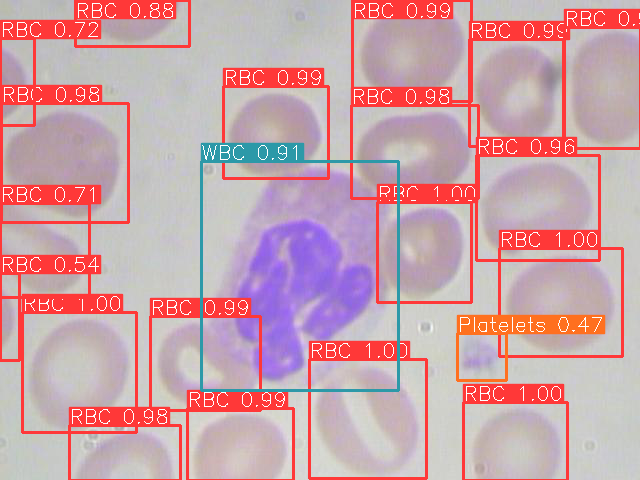

In [ ]:
model = YOLO('CBCWeights.pt')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# observe results
image = "datasets/data/Testing/images/BloodImage_00391.jpg"
results = model.predict(image)
render = render_result(model=model, image=image, result=results[0])
render.show()



We will count the number of objects in each class and find the ratio of cells in each image

In [ ]:
results = model.predict(image, stream=True)
blood_count = {"RBC":0, "WBC":0, "Platelets":0}

for r in results:
    for c in r.boxes.cls:
      if model.names[int(c)] in blood_count.keys():
         blood_count[model.names[int(c)]] += 1

print(blood_count)

results = [blood_count['RBC']/sum(blood_count.values()), blood_count['WBC']/sum(blood_count.values()), blood_count['Platelets']/sum(blood_count.values())]

print(results)

image 1/1 /content/AutoCBC/datasets/data/Testing/images/BloodImage_00391.jpg: 480x640 19 RBCs, 1 WBC, 1 Platelets, 14.2ms
Speed: 3.1ms pre-process, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


{'RBC': 19, 'WBC': 1, 'Platelets': 1}
[0.9047619047619048, 0.047619047619047616, 0.047619047619047616]
